In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os
import pickle

In [2]:
pd.__version__

'0.23.0'

In [3]:
os.chdir(r'E:\PYTHON\Data')

In [4]:
os.getcwd()

'E:\\PYTHON\\Data'

In [5]:
cwd=os.getcwd()

In [6]:
img=plt.imread(cwd+r'\natural_images\airplane\airplane_0000.jpg')

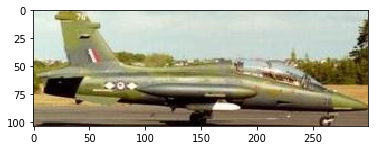

In [7]:
plt.imshow(img)
plt.show()

# Reading Processing images

In [103]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical

C:\Users\Gaya\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [55]:
DATADIR="E:/Python/Data/natural_images"
CATEGORIES=['airplane','car','cat','dog','flower','fruit','motorbike','person']

In [9]:
os.getcwd()

'E:\\PYTHON\\Data'

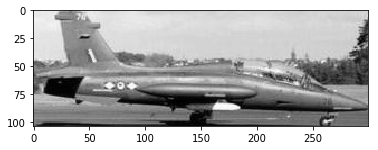

In [59]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  
        plt.show() 
        
        break  # we just want one for now so break
    break  #...and one more!

In [60]:
print(img_array)

[[234 234 235 ... 212 213 211]
 [232 233 234 ... 215 210 212]
 [232 233 233 ... 209 212 213]
 ...
 [131 130 131 ... 105 104 103]
 [115 107  98 ... 115 116 114]
 [121 110  96 ... 119 121 119]]


In [61]:
print(img_array.shape)

(104, 300)


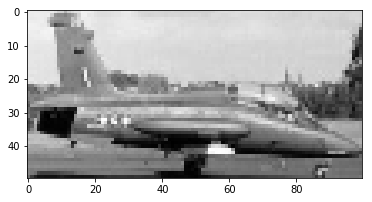

In [68]:
IMG_H = 50
IMG_W = 100

new_array = cv2.resize(img_array, (IMG_W, IMG_H))
plt.imshow(new_array, cmap='gray')
plt.show()

In [70]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_W, IMG_H))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

6899


In [73]:
training_data

[[array([[233, 234, 234, ..., 211, 211, 211],
         [234, 233, 235, ..., 214, 213, 211],
         [233, 231, 232, ..., 213, 215, 213],
         ...,
         [127, 122, 127, ..., 114, 114, 110],
         [129, 120, 110, ..., 109, 108, 105],
         [108,  60,  34, ..., 113, 113, 118]], dtype=uint8), 0],
 [array([[248, 248, 248, ..., 195, 195, 194],
         [247, 248, 248, ..., 195, 196, 195],
         [248, 249, 248, ..., 195, 194, 193],
         ...,
         [247, 247, 246, ..., 194, 191, 188],
         [247, 248, 246, ..., 190, 188, 187],
         [247, 248, 247, ..., 189, 188, 188]], dtype=uint8), 0],
 [array([[147, 146, 144, ..., 107, 107, 105],
         [147, 144, 141, ..., 110, 106, 105],
         [148, 142, 142, ..., 107, 104, 107],
         ...,
         [164, 156, 153, ..., 124, 124, 122],
         [147, 150, 155, ..., 126, 118, 120],
         [160, 146, 138, ...,  97,  94, 107]], dtype=uint8), 0],
 [array([[189, 194, 194, ..., 208, 209, 209],
         [188, 194, 195, ..

In [74]:
import random

random.shuffle(training_data)

In [75]:
for sample in training_data[:10]:
    print(sample[1])

6
1
0
2
3
3
5
4
0
7


In [76]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_W, IMG_H, 1))

X = np.array(X).reshape(-1, IMG_W, IMG_H, 1)

[[[[ 17]
   [ 19]
   [ 18]
   ...
   [ 22]
   [ 21]
   [ 20]]

  [[ 20]
   [ 21]
   [ 21]
   ...
   [ 23]
   [ 24]
   [253]]

  [[ 17]
   [ 18]
   [ 17]
   ...
   [ 20]
   [ 19]
   [ 19]]

  ...

  [[ 21]
   [ 21]
   [ 21]
   ...
   [ 23]
   [ 23]
   [254]]

  [[ 17]
   [ 17]
   [ 16]
   ...
   [ 22]
   [ 22]
   [ 22]]

  [[ 22]
   [ 22]
   [ 22]
   ...
   [ 26]
   [ 22]
   [254]]]]


In [78]:
os.getcwd()

'E:\\Python\\Data\\natural_images'

In [79]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
os.chdir(r'E:\PYTHON\Data\natural_images')

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [14]:
type(X)

numpy.ndarray

In [109]:
type(y)

list

In [110]:
y=np.array(y)

In [111]:
type(y)

numpy.ndarray

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [16]:
pd.Series(y_train).value_counts()

5    750
7    739
1    726
2    664
4    632
6    591
0    545
3    527
dtype: int64

In [17]:
pd.Series(y_test).value_counts()

5    250
7    247
1    242
2    221
4    211
6    197
0    182
3    175
dtype: int64

In [18]:
pd.Series(y_test).value_counts()/pd.Series(y_train).value_counts()

5    0.333333
7    0.334235
1    0.333333
2    0.332831
4    0.333861
6    0.333333
0    0.333945
3    0.332068
dtype: float64

In [19]:
y_train1=pd.get_dummies(y_train)

In [65]:
y_test1=pd.get_dummies(y_test)

In [20]:
X_train=X_train/255
X_test=X_test/255

In [39]:
X_train.shape

(5174, 100, 50, 1)

In [40]:
X_test.shape

(1725, 100, 50, 1)

# Modeling

In [179]:
X_train.shape[1:]

(100, 50, 1)

In [57]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout,Embedding
from keras.models import load_model
import keras
from keras.callbacks import TensorBoard
import time

In [157]:
seq_model=Sequential()
seq_model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
seq_model.add(MaxPooling2D((2,2)))
seq_model.add(Conv2D(128,(3,3)))
seq_model.add(MaxPooling2D((2,2)))
seq_model.add(Flatten())
seq_model.add(Dense(8,activation='softmax'))

In [158]:
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 48, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 49, 24, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 23, 11, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 259080    
Total params: 333,576
Trainable params: 333,576
Non-trainable params: 0
_________________________________________________________________


In [159]:
seq_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [180]:
X_train.shape

(5174, 100, 50, 1)

In [182]:
hist=seq_model.fit(X_train,y_train1,epochs=10,batch_size=256,validation_split=0.3)

Train on 3621 samples, validate on 1553 samples
Epoch 1/10
3621/3621 [==============================] - 183s 50ms/step - loss: 0.9625 - acc: 0.6553 - val_loss: 0.8376 - val_acc: 0.7154
Epoch 2/10
3621/3621 [==============================] - 182s 50ms/step - loss: 0.7314 - acc: 0.7390 - val_loss: 0.7028 - val_acc: 0.7560
Epoch 3/10
3621/3621 [==============================] - 182s 50ms/step - loss: 0.6318 - acc: 0.7832 - val_loss: 0.6440 - val_acc: 0.7708
Epoch 4/10
3621/3621 [==============================] - 316s 87ms/step - loss: 0.5529 - acc: 0.8056 - val_loss: 0.6640 - val_acc: 0.7540
Epoch 5/10
3621/3621 [==============================] - 285s 79ms/step - loss: 0.5175 - acc: 0.8141 - val_loss: 0.5882 - val_acc: 0.7708
Epoch 6/10
3621/3621 [==============================] - 243s 67ms/step - loss: 0.4722 - acc: 0.8302 - val_loss: 0.6101 - val_acc: 0.7875
Epoch 7/10
3621/3621 [==============================] - 249s 69ms/step - loss: 0.4621 - acc: 0.8362 - val_loss: 0.5703 - val_acc: 

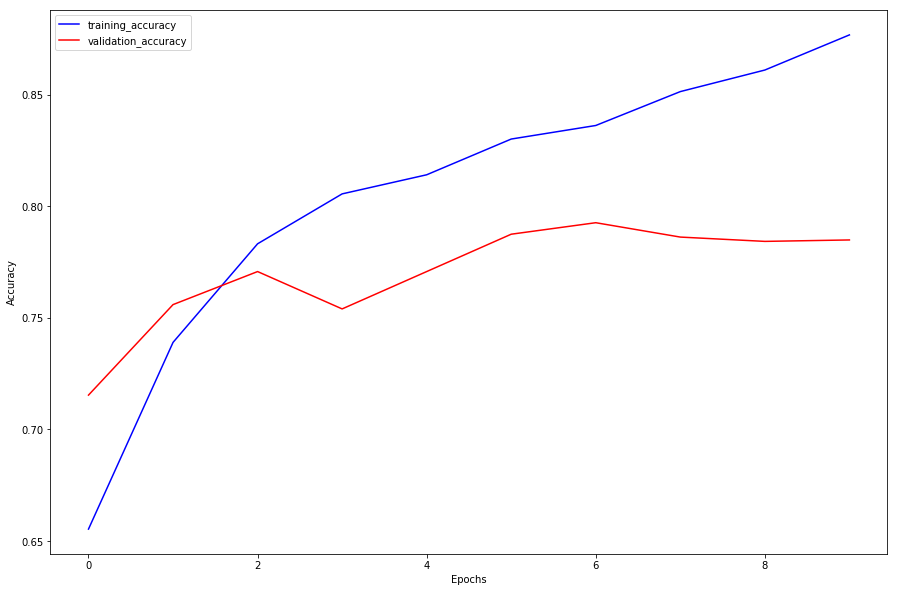

In [192]:
plt.figure(figsize=(15,10))
plt.plot(hist.history['acc'],'b',label='training_accuracy')
plt.plot(hist.history['val_acc'],'r',label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [193]:
os.getcwd()

'E:\\Python\\Data\\natural_images'

In [194]:
seq_model.save('seq_mod1')

In [196]:
seq_mod1=load_model('seq_mod1')

In [197]:
seq_mod1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 48, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 49, 24, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 23, 11, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 259080    
Total params: 333,576
Trainable params: 333,576
Non-trainable params: 0
_________________________________________________________________


# Model improvement

In [58]:
NAME = "CNN_8cl_{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
seq_model2=Sequential()

seq_model2.add(Conv2D(128,(3,3),activation='relu',input_shape=X_train.shape[1:]))
seq_model2.add(MaxPooling2D((2,2)))
seq_model2.add(Dropout(0.2))
seq_model2.add(Conv2D(128,(3,3),activation='relu'))
seq_model2.add(MaxPooling2D((2,2)))
seq_model2.add(Dropout(0.2))
seq_model2.add(Conv2D(128,(3,3),activation='relu'))
seq_model2.add(MaxPooling2D((2,2)))
seq_model2.add(Dropout(0.2))
seq_model2.add(Conv2D(128,(3,3),activation='relu'))
seq_model2.add(MaxPooling2D((2,2)))
seq_model2.add(Dropout(0.2))
seq_model2.add(Flatten())
seq_model2.add(Dense(8,activation='softmax'))

In [59]:
seq_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 48, 128)       1280      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 49, 24, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 24, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 22, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 11, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 11, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 9, 128)        147584    
__________

In [60]:
seq_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [61]:
hist2=seq_model2.fit(X_train,y_train1,epochs=20,batch_size=128,callbacks=[tensorboard],validation_split=0.3)

Train on 3621 samples, validate on 1553 samples
Epoch 1/20
3621/3621 [==============================] - 601s 166ms/step - loss: 1.9584 - acc: 0.2414 - val_loss: 1.6307 - val_acc: 0.4334
Epoch 2/20
3621/3621 [==============================] - 473s 131ms/step - loss: 1.4744 - acc: 0.4703 - val_loss: 1.2005 - val_acc: 0.5570
Epoch 3/20
3621/3621 [==============================] - 577s 159ms/step - loss: 1.0669 - acc: 0.6120 - val_loss: 0.9135 - val_acc: 0.6800
Epoch 4/20
3621/3621 [==============================] - 587s 162ms/step - loss: 0.9123 - acc: 0.6813 - val_loss: 0.8198 - val_acc: 0.7186
Epoch 5/20
3621/3621 [==============================] - 611s 169ms/step - loss: 0.8105 - acc: 0.7026 - val_loss: 0.7216 - val_acc: 0.7534
Epoch 6/20
3621/3621 [==============================] - 521s 144ms/step - loss: 0.7496 - acc: 0.7258 - val_loss: 0.7574 - val_acc: 0.7341
Epoch 7/20
3621/3621 [==============================] - 437s 121ms/step - loss: 0.7131 - acc: 0.7324 - val_loss: 0.6712 - va

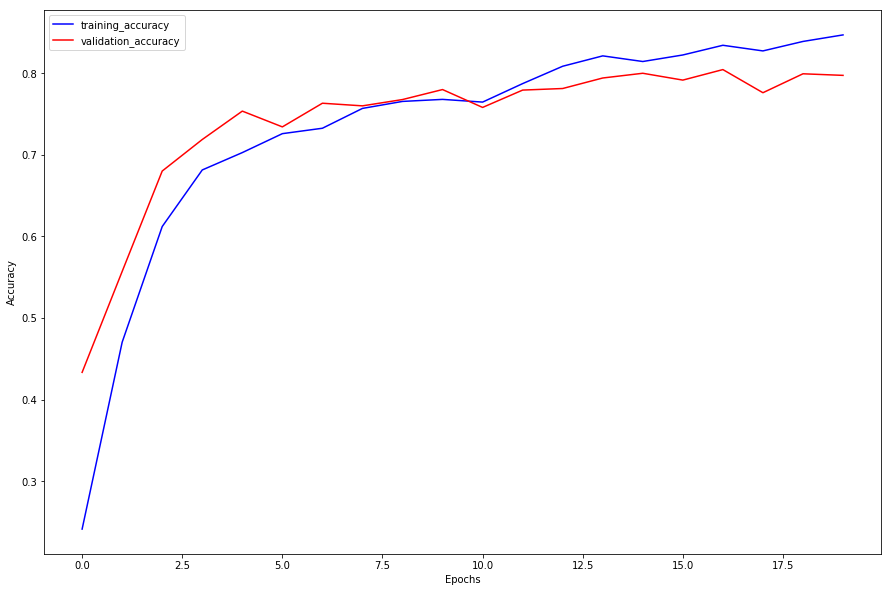

In [67]:
plt.figure(figsize=(15,10))
plt.plot(hist2.history['acc'],'b',label='training_accuracy')
plt.plot(hist2.history['val_acc'],'r',label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
seq_model2.save('seq_mod2')

In [66]:
seq_model2.evaluate(X_test,y_test1)

1725/1725 [==============================] - 53s 31ms/step


[0.5664656286654265, 0.7878260864727739]